## Global Data Analysis: Gathering the Data

 Data Source: https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023

In [26]:
# This analysis explore various factors from a dataset containing global data for the year 2023
# The goal is to gain insights into relationships between birth rates, fertility rates, infant moratality, 
#   life expectancy, physician availability, and population accross different countries

In [2]:
#import libraries: pandas, numpy, seaborn, matplotlib, kaggle, zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kaggle
import zipfile

In [43]:
#get  datset from kaggle
!kaggle datasets download -d nelgiriyewithana/countries-of-the-world-2023

11111.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


countries-of-the-world-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [44]:
zipfile_name = 'countries-of-the-world-2023.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [3]:
#Load dataset from CSV file
df = pd.read_csv('world-data-2023.csv')
df.head()

,Country,Density\n(P/Km2),Abbreviation,Agricultural Land( %),Land Area(Km2),Armed Forces size,Birth Rate,Calling Code,Capital/Major City,Co2-Emissions,...,Out of pocket health expenditure,Physicians per thousand,Population,Population: Labor force participation (%),Tax revenue (%),Total tax rate,Unemployment rate,Urban_population,Latitude,Longitude
0,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93.0,Kabul,"8,672",...,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.939110,67.709953
1,Albania,105,AL,43.10%,"28,748","9,000",11.78,355.0,Tirana,"4,536",...,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.153332,20.168331
2,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213.0,Algiers,"150,006",...,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.033886,1.659626
3,Andorra,164,AD,40.00%,468,NaN,7.20,376.0,Andorra la Vella,469,...,36.40%,3.33,"77,142",NaN,NaN,NaN,NaN,"67,873",42.506285,1.521801
4,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244.0,Luanda,"34,693",...,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.202692,17.873887


## Data Cleaning and Prep

In [4]:
#This dataset contains 35 columns, I will reduce the size of the dataset and clean the subset based on the features I want to explore
df.columns
df = df[['Country','Birth Rate','Fertility Rate','Infant mortality','Life expectancy','Physicians per thousand','Population']]

In [5]:
#Initial Exploration - info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  195 non-null    object 
 1   Birth Rate               189 non-null    float64
 2   Fertility Rate           188 non-null    float64
 3   Infant mortality         189 non-null    float64
 4   Life expectancy          187 non-null    float64
 5   Physicians per thousand  188 non-null    float64
 6   Population               194 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


In [6]:
## The Following columns have missing or null values
df.columns[df.isna().any()].tolist()

['Birth Rate',
 'Fertility Rate',
 'Infant mortality',
 'Life expectancy',
 'Physicians per thousand',
 'Population']

In [7]:
#convert population to string to replace commas (this caused the datatype to be misinterpreted as 'object')
df['Population'] = df['Population'].astype(str).str.replace(',','')

#convert population to numeric
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')



In [8]:
#Columns to impute
columns_to_impute = df.columns[df.isna().any()].tolist()

#Impute missing values with median
median_values = df[columns_to_impute].median(numeric_only=True)
df[columns_to_impute] = df[columns_to_impute].fillna(median_values)

In [9]:
#rename columns remove spaces
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_mortality',
       'Life_expectancy', 'Physicians_per_thousand', 'Population'],
      dtype='object')

In [10]:
#camel case column names for consistency
df.columns=df.columns.str.title()
df.columns

Index(['Country', 'Birth_Rate', 'Fertility_Rate', 'Infant_Mortality',
       'Life_Expectancy', 'Physicians_Per_Thousand', 'Population'],
      dtype='object')

## Visualizations

In [83]:
df.dtypes

Country                     object
Birth_Rate                 float64
Fertility_Rate             float64
Infant_Mortality           float64
Life_Expectancy            float64
Physicians_Per_Thousand    float64
Population                 float64
dtype: object

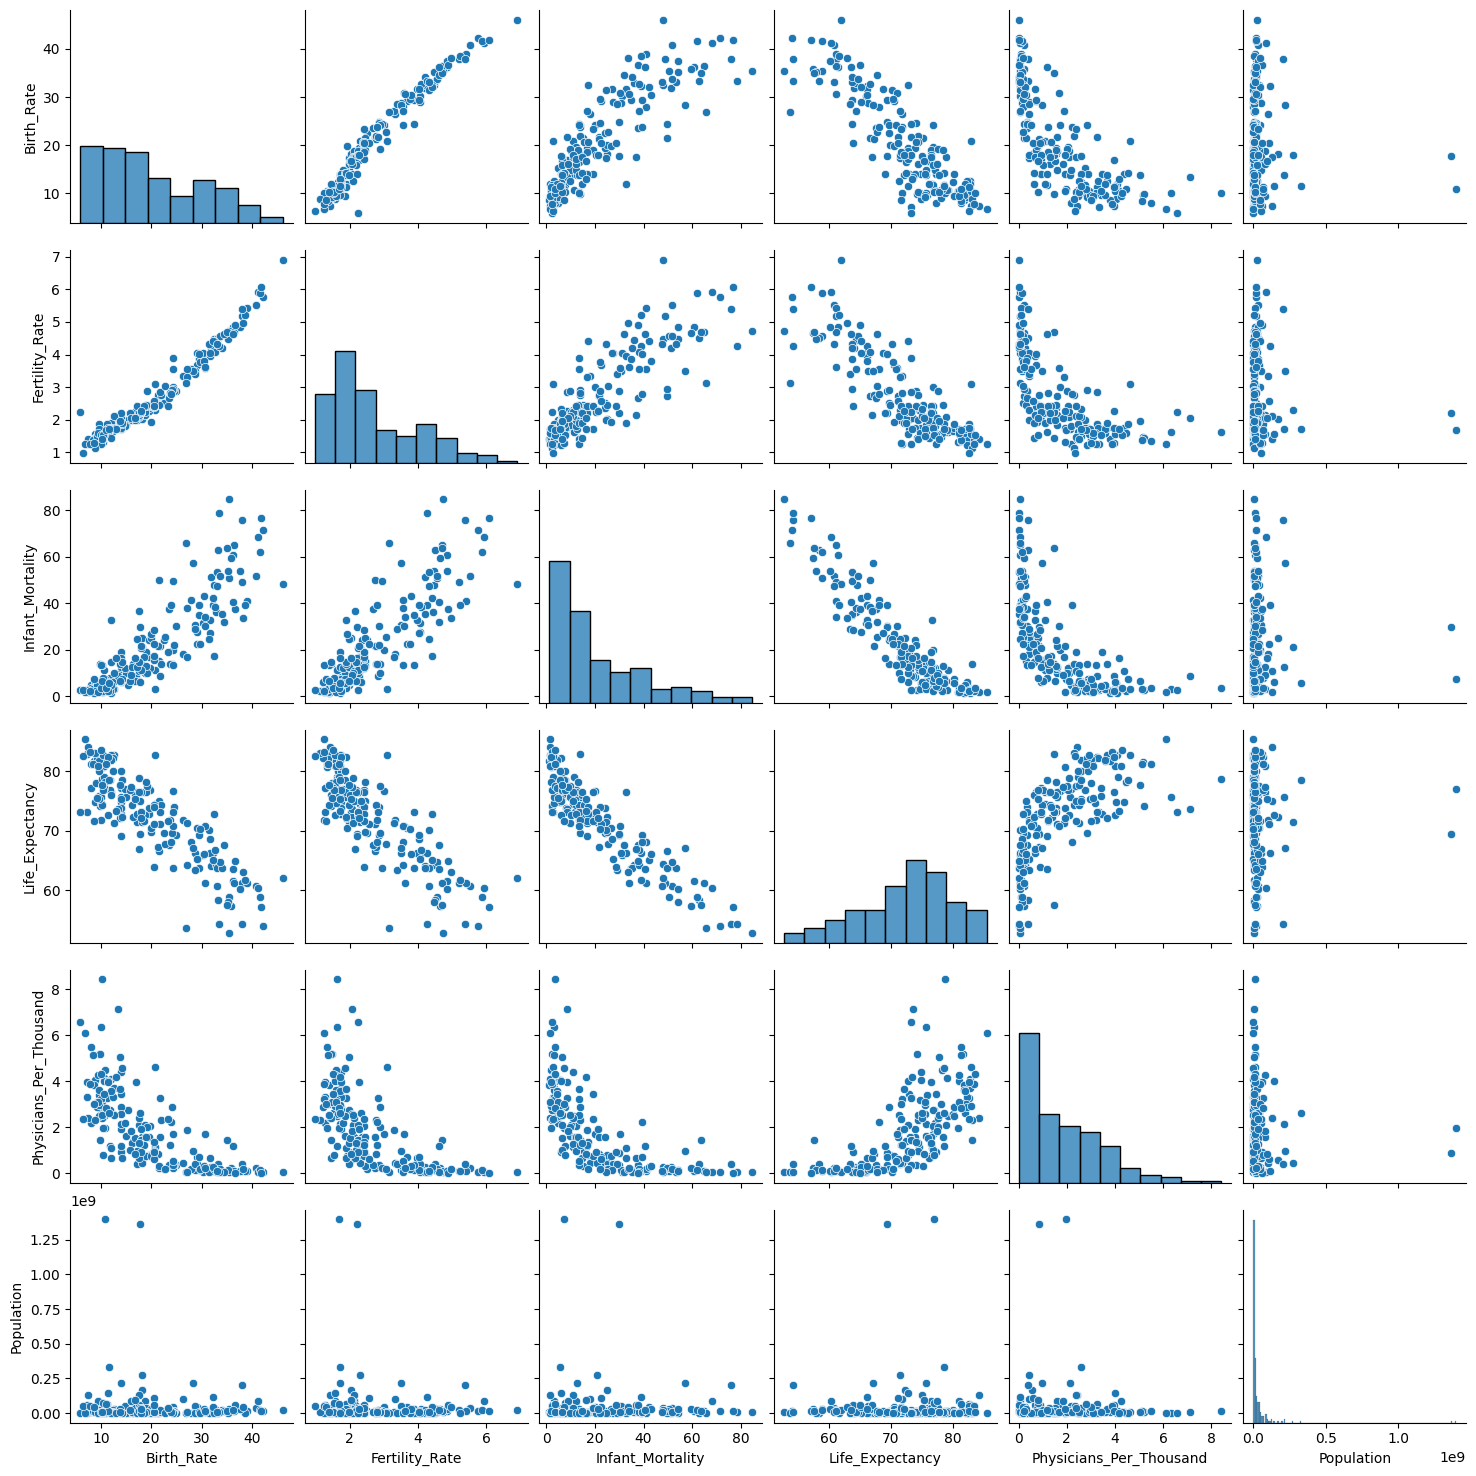

In [84]:
# pair plots to explore correlations in the dataset
sns.pairplot(df)

 This demonstrates some interesting and strong correlations between aspects of the dataset

Text(0.5, 1.0, 'Correlation Matrix')

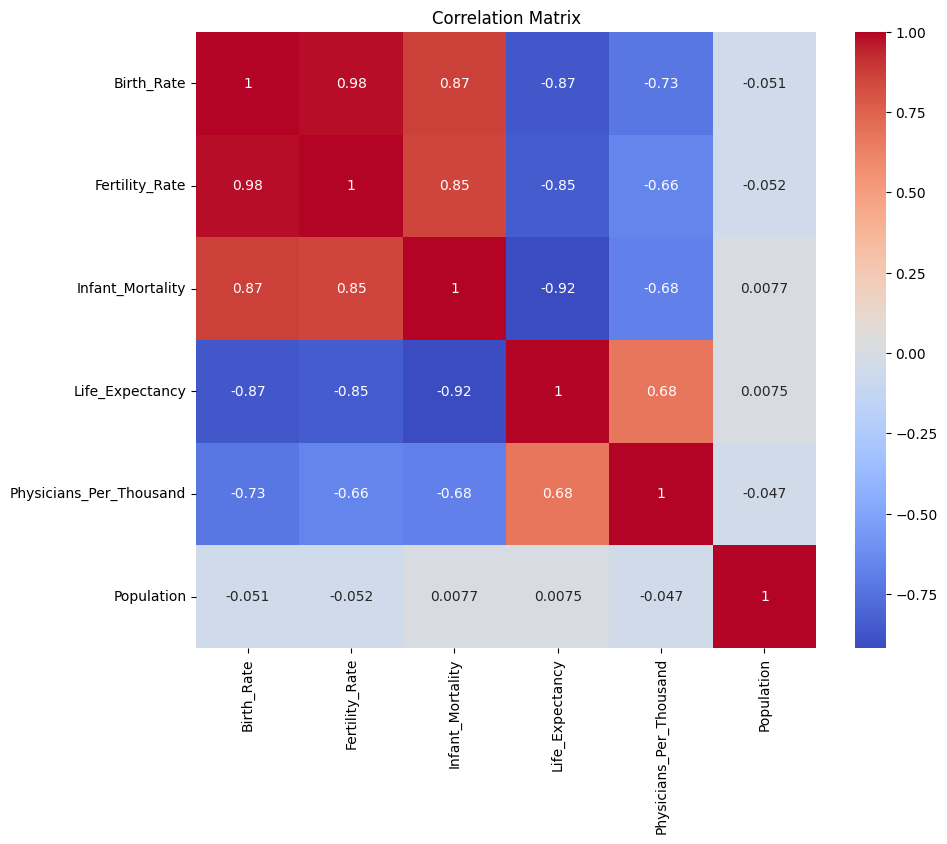

In [87]:
#calculate and display correlation matrix heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')

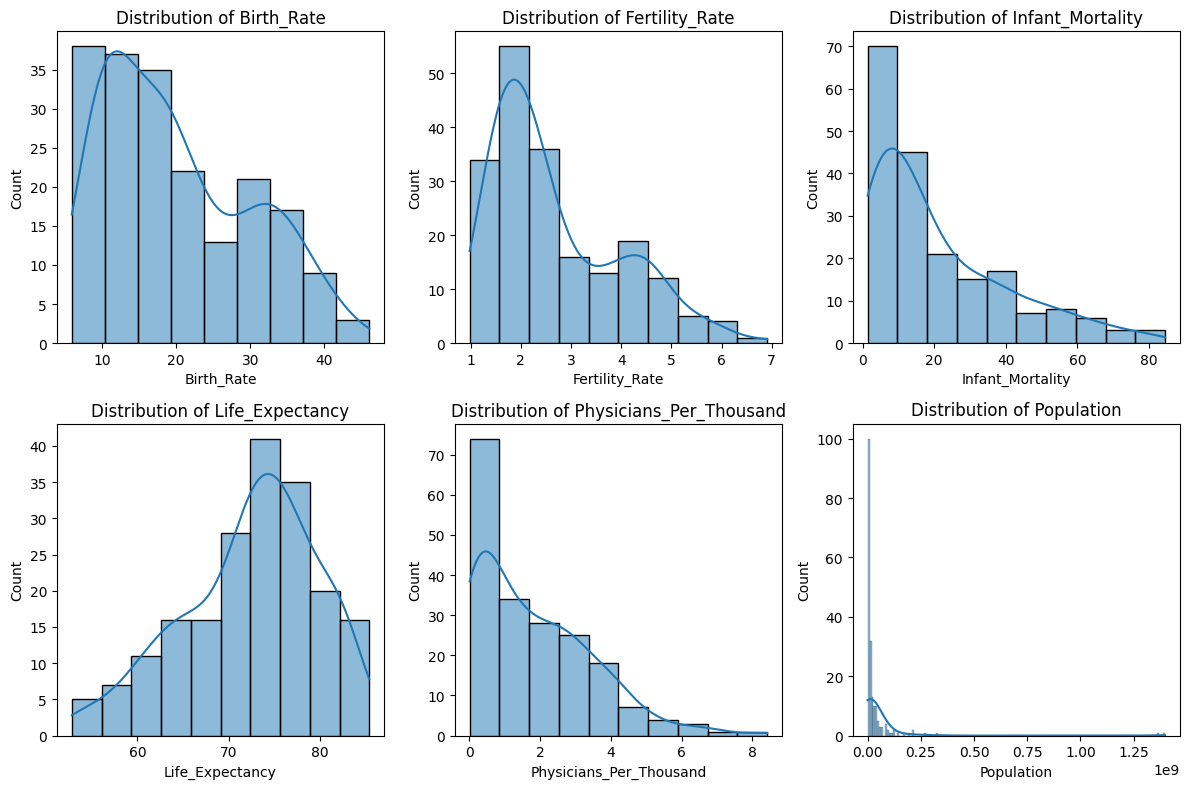

In [88]:
#Display distribution histograms for each column
plt.figure(figsize=(12,8))

for column in df.columns[1:]:
    plt.subplot(2,3, df.columns.get_loc(column))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

Text(0.5, 1.0, 'Scatter Plot: Birth Rate vs. Life Expectancy')

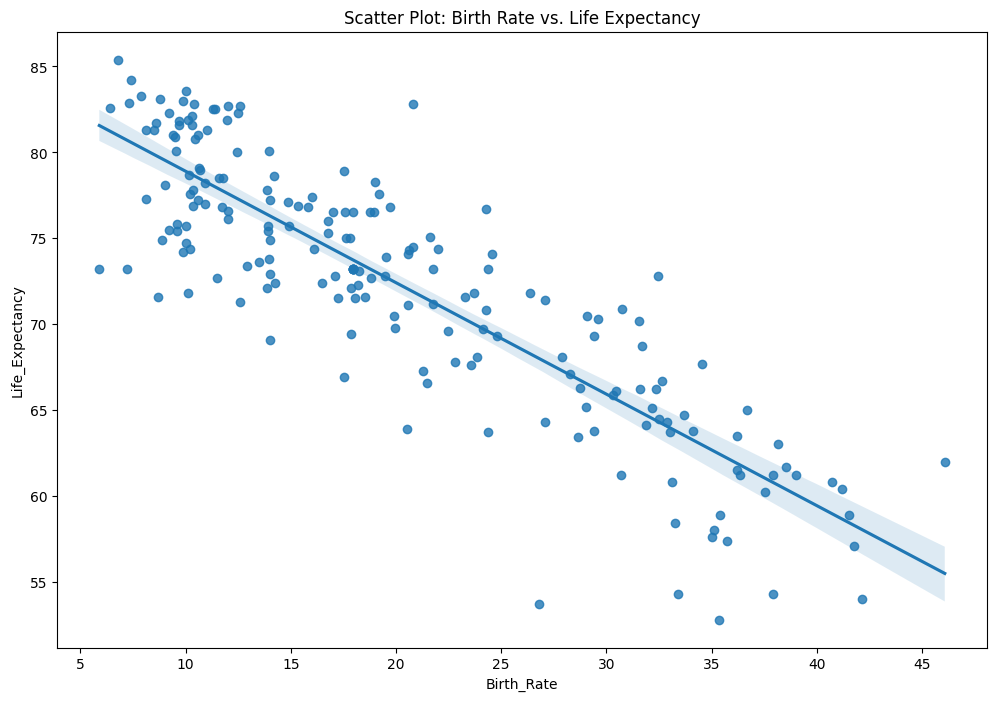

In [89]:
# Display scatter plot of birth rate vs life expectancy
plt.figure(figsize=(12,8))
sns.regplot(data=df,x='Birth_Rate',y='Life_Expectancy')
plt.title('Scatter Plot: Birth Rate vs. Life Expectancy')

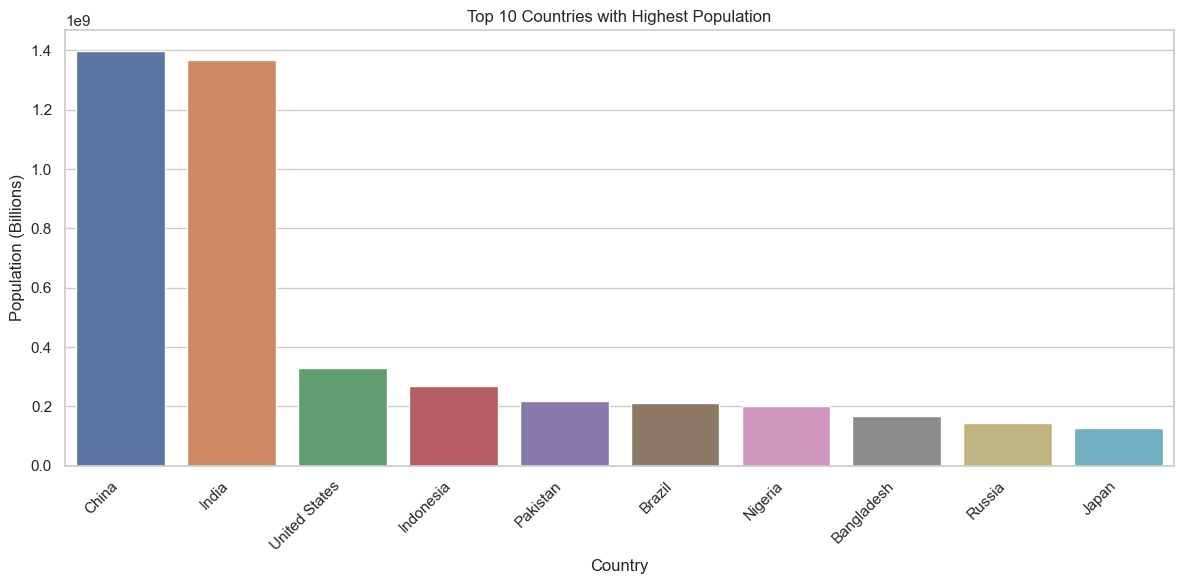

In [99]:
#Display top 10 countries with highest population
top_population_countries = df.nlargest(10,'Population')

#set style and size of plot
sns.set(style='whitegrid')
plt.figure(figsize=(12,6))

#create bar plot
ax = sns.barplot(x='Country',y='Population', hue='Country',data=top_population_countries)

#add axis labels and title
ax.set_title(f'Top {10} Countries with Highest Population')
ax.set_xlabel('Country')
ax.set_ylabel('Population (Billions)')

# rotate x axis for readability
plt.xticks(rotation=45,ha='right')

#Display the Plot
plt.tight_layout()
plt.show()


## Grouping and Calculations

In [11]:
# Calculate and display averag =e fertility rates by country
avg_fertility_by_country = df.groupby('Country')['Fertility_Rate'].mean()
print ('Average Fertility Rate by Country')
print(avg_fertility_by_country)

Average Fertility Rate by Country
Country
Afghanistan    4.47
Albania        1.62
Algeria        3.02
Andorra        1.27
Angola         5.52
               ... 
Venezuela      2.27
Vietnam        2.05
Yemen          3.79
Zambia         4.63
Zimbabwe       3.62
Name: Fertility_Rate, Length: 195, dtype: float64


In [93]:
# Calculate and display countries with the highest life expectancy
Highest = df.groupby('Country')['Life_Expectancy'].max().nlargest(5)
print(Highest)

Country
San Marino     85.4
Japan          84.2
Switzerland    83.6
Spain          83.3
Singapore      83.1
Name: Life_Expectancy, dtype: float64


In [94]:
# Calculate and display countries with lowest life expectancy
Lowest = df.groupby('Country')['Life_Expectancy'].min().nsmallest(5)
print(Lowest)

Country
Central African Republic    52.8
Lesotho                     53.7
Chad                        54.0
Nigeria                     54.3
Sierra Leone                54.3
Name: Life_Expectancy, dtype: float64


In [95]:
#compare birth rates with fertility rates
birth_fertility_comparison = df[['Country','Birth_Rate','Fertility_Rate']]
print(birth_fertility_comparison)

         Country  Birth_Rate  Fertility_Rate
0    Afghanistan       32.49            4.47
1        Albania       11.78            1.62
2        Algeria       24.28            3.02
3        Andorra        7.20            1.27
4         Angola       40.73            5.52
..           ...         ...             ...
190    Venezuela       17.88            2.27
191      Vietnam       16.75            2.05
192        Yemen       30.45            3.79
193       Zambia       36.19            4.63
194     Zimbabwe       30.68            3.62

[195 rows x 3 columns]


In [97]:
# compare Life Expectancy with Physicians per Thousand
life_physicians_comparison = df[['Country','Life_Expectancy','Physicians_Per_Thousand']]
print(life_physicians_comparison)

         Country  Life_Expectancy  Physicians_Per_Thousand
0    Afghanistan             64.5                     0.28
1        Albania             78.5                     1.20
2        Algeria             76.7                     1.72
3        Andorra             73.2                     3.33
4         Angola             60.8                     0.21
..           ...              ...                      ...
190    Venezuela             72.1                     1.92
191      Vietnam             75.3                     0.82
192        Yemen             66.1                     0.31
193       Zambia             63.5                     1.19
194     Zimbabwe             61.2                     0.21

[195 rows x 3 columns]


## Summary

522.965